In [25]:
%env ASTERIA=/home/jakob/software/ASTERIA/ASTERIA

from asteria.simulation import Simulation
from analysis import *
from plthelper import *

import matplotlib.pyplot as plt

env: ASTERIA=/home/jakob/software/ASTERIA/ASTERIA


In [26]:
add_wls = True
detector_scope = "Gen2"

trials = 10000
distance = 1*u.kpc
frequency = 80*u.Hz # 50 Hz and 400 Hz, in steps of 50 Hz
amplitude = 0.2 # 1% and 50% in log steps (1%, 2%, 5%, 10%, 20%, 50%)
time_start = 150*u.ms
time_end = 300*u.ms
position="center"

sim_dt = 1 * u.ms
res_dt = 1 * u.ms

hann_len = 100*u.ms # length of Hann window
hann_res = 5*u.Hz # relates to frequency resolution from hanning, mfft = freq_sam/freq_sam
hann_hop = 20*u.ms # offset by which Hann window is slided over signal
freq_sam = (1/res_dt).to(u.Hz) # = 1/time_res
time_int = True
time_win = [0, 100] * u.s # time independent
freq_win = [50, 1E6] * u.Hz # 

temp_para = {"frequency": frequency, 
             "amplitude": amplitude, #in percent of max value
             "time_start": time_start,
             "time_end": time_end,
             "position": position}


stf_para = {"hann_len": hann_len,
             "hann_res": hann_res,
             "hann_hop": hann_hop, 
             "freq_sam": freq_sam,
             "time_int": time_int,
             "time_win": time_win,
             "freq_win": freq_win}


model = {'name': 'Sukhbold_2015',
         'param':{
             'progenitor_mass': 9.6*u.Msun, 
             'eos': 'LS220'}
        }

sim = Simulation(model=model,
                 distance=10* u.kpc, 
                 res_dt=res_dt,
                 Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                 tmin=0.000*u.s, tmax=1.000*u.s, dt=sim_dt,
                 hierarchy = 'normal',
                 mixing_scheme = 'NoTransformation',
                 detector_scope = detector_scope,
                 add_wls = add_wls)
sim.run()

In [27]:
# Initialize analysis class and run analysis
ana = Analysis(sim, res_dt = res_dt, distance=distance, trials = trials, temp_para=temp_para)
ana.run(mode = "STF", ft_para = stf_para, model = "generic")

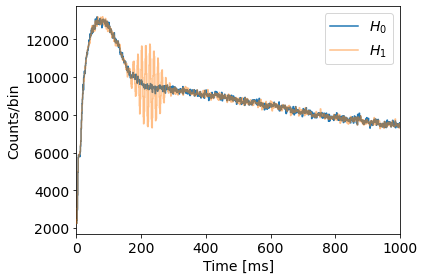

In [28]:
plot_hits(ana.sim.time, ana._comb)

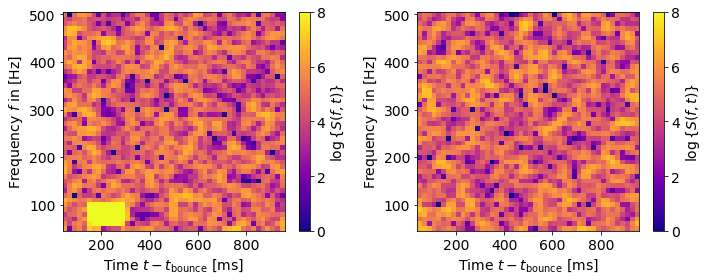

In [29]:
plot_stft(ana._time_new, ana._freq_new, ana._stf)

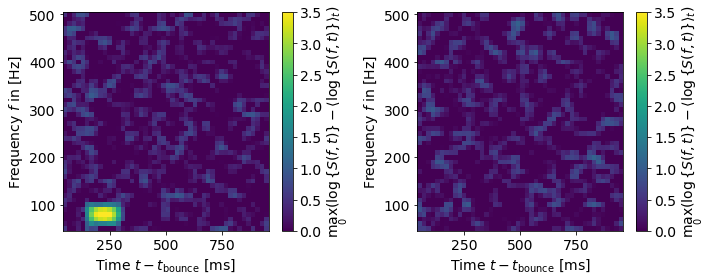

In [30]:
plot_stft_log(ana._time_new, ana._freq_new, ana._log)

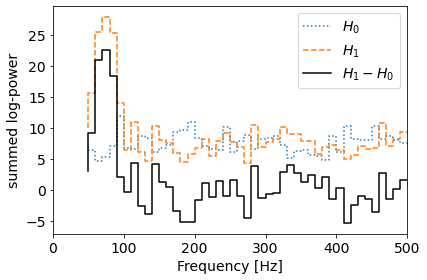

In [31]:
if time_int:
    plot_stft_time_int(ana._freq_new, ana._log_tint)

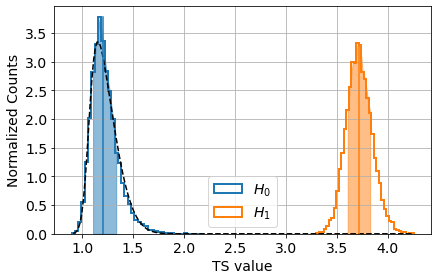

In [32]:
plot_ts(ana.ts)

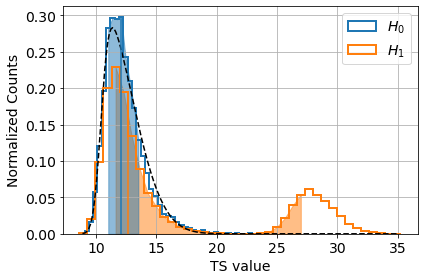

In [33]:
if time_int:
    plot_ts(ana.ts_tint)

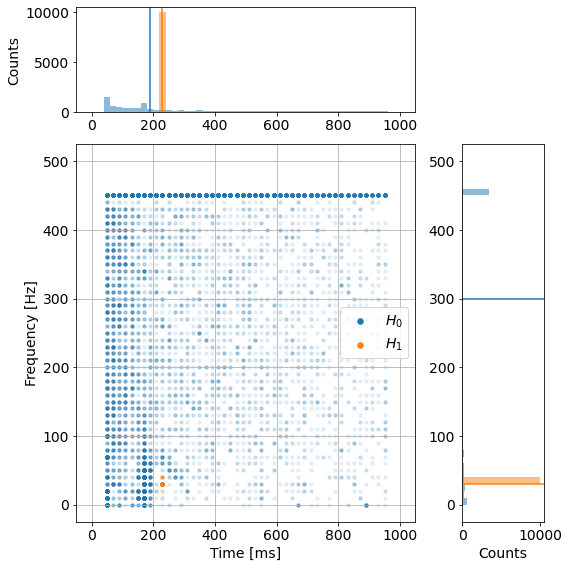

In [34]:
plot_fit_time_freq(ana.ffit, ana.tfit)

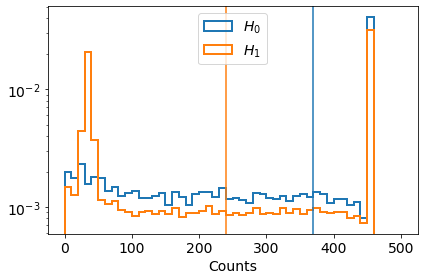

In [35]:
if time_int:
    plot_fit_freq(ana.ffit_tint)

In [36]:
dist_range = np.arange(2,20,2) * u.kpc
Zscore, Ts_stat = ana.dist_scan(dist_range, mode = "STF", ft_para = stf_para, model = "generic", verbose = True)

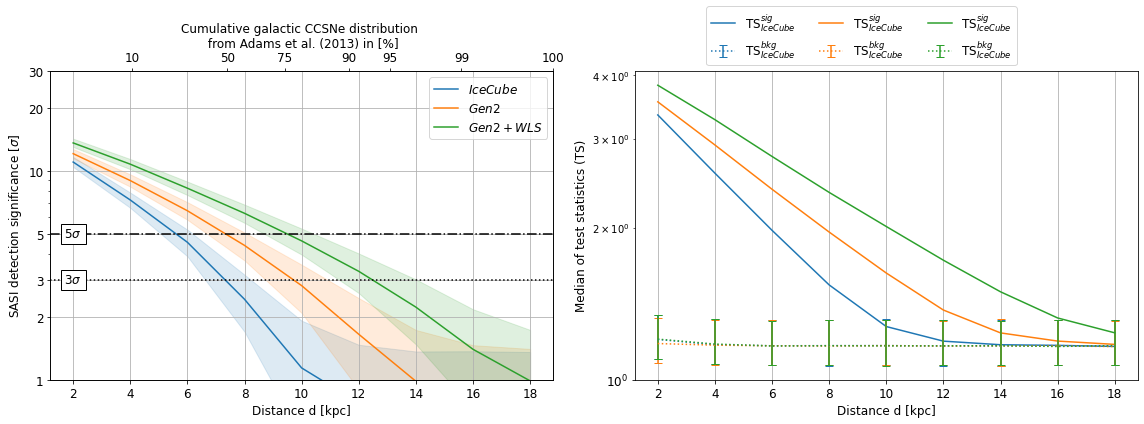

In [37]:
plot_significance(dist_range, Zscore, Ts_stat)

In [ ]:
#TODO
#-experiment with frequency cuts
#-smoothen the null hypo light curve
#-CCSN cdf is not correct, 25 kpc whould be 100%